<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns


# Reading the Data

In [ ]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")
ProdList = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=1,sheet_name="Product List")
Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)

<ipython-input-2-69dde8b565b3>:1: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


In [ ]:
##ProdList
ProdList.info()
ProdList=ProdList.rename(columns={"Unnamed: 1":"Equipment"})
ProdList.drop("Unnamed: 0",1,inplace=True)
ProdList.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  75 non-null     object 
 2   Frequency   75 non-null     int64  
 3   Percent     75 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB


<ipython-input-3-a1d3ec26873d>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ProdList.drop("Unnamed: 0",1,inplace=True)


,Equipment,Frequency,Percent
0,\N,5828,0.353464
1,AmplifierReceiver,4056,0.245994
2,AudioMP3Player,112892,6.846819
3,Binoculars,14599,0.885419
4,BoomBox,2879,0.174609


In [ ]:
##Investments
Investment.head()
Investment = Investment.drop("Unnamed: 0",1)

<ipython-input-4-ad6f8d046e0d>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Investment = Investment.drop("Unnamed: 0",1)


In [ ]:
Investment.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN


In [ ]:
SalesCal.head(10)
SalesCal=SalesCal.drop("Unnamed: 0",1)
SalesCal.rename(columns={"Unnamed: 1":"Year"},inplace=True)
SalesCal.iloc[0:6,0:1]='2015'
SalesCal.iloc[6:11,0:1]='2016'
SalesCal

<ipython-input-6-be79cacde657>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  SalesCal=SalesCal.drop("Unnamed: 0",1)


,Year,Sales Calendar
0,2015,(18-19th July)
1,2015,(15-17th Aug)
2,2015,(28-30th Aug)
3,2015,(15-17th Oct)
4,2015,(7-14th Nov)
5,2015,(25th Dec'15 - 3rd Jan'16)
6,2016,(20-22 Jan)
7,2016,(1-2 Feb)
8,2016,(20-21 Feb)
9,2016,(14-15 Feb)


In [ ]:
MonthlyNPS.rename(columns={"Unnamed: 0":"Header"},inplace=True)

# Data Cleaning



 Basic data type handling

In [ ]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

<ipython-input-8-de44342a677d>:1: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


In [ ]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [ ]:
# EleData.info()
EleData.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [ ]:
# EleData.order_date.describe()
EleData["order_date"]= pd.to_datetime(EleData.order_date).dt.date
EleData.order_id=EleData.order_id.astype(int)
EleData.order_item_id=EleData.order_item_id.astype(int)


In [ ]:
EleData.Year.value_counts()
EleData.Month.value_counts()

9     209202
10    207301
12    158151
5     157072
3     153299
2     144084
1     143768
4     134390
11    130203
6     121798
7      89285
8        271
Name: Month, dtype: int64

In [ ]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [ ]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [ ]:
## removing duplicates using strip and lower
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508710 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   fsn_id                           1508710 non-null  object
 1   order_date                       1508710 non-null  object
 2   Year                             1508710 non-null  int64 
 3   Month                            1508710 non-null  int64 
 4   order_id                         1508710 non-null  int64 
 5   order_item_id                    1508710 non-null  int64 
 6   gmv                              1508710 non-null  object
 7   units                            1508710 non-null  int64 
 8   deliverybdays                    1508710 non-null  object
 9   deliverycdays                    1508710 non-null  object
 10  s1_fact.order_payment_type       1508710 non-null  object
 11  sla                              1508710 non-null  int64 
 12  

In [ ]:
# units
EleData.units.value_counts()

1     1488142
2       16585
3        2010
4         786
5         669
6         166
10        159
8          63
7          43
9          26
15         12
12         10
20          8
16          6
11          6
18          4
14          3
21          2
17          2
50          2
13          2
29          1
39          1
30          1
34          1
Name: units, dtype: int64

In [ ]:
## gmv
EleData.loc[EleData.gmv=='',"gmv"]=EleData.units*EleData.product_mrp

In [ ]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508710 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   fsn_id                           1508710 non-null  object
 1   order_date                       1508710 non-null  object
 2   Year                             1508710 non-null  int64 
 3   Month                            1508710 non-null  int64 
 4   order_id                         1508710 non-null  int64 
 5   order_item_id                    1508710 non-null  int64 
 6   gmv                              1508710 non-null  object
 7   units                            1508710 non-null  int64 
 8   deliverybdays                    1508710 non-null  object
 9   deliverycdays                    1508710 non-null  object
 10  s1_fact.order_payment_type       1508710 non-null  object
 11  sla                              1508710 non-null  int64 
 12  

<ipython-input-18-9740327a0221>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


In [ ]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        1090984
prepaid     417726
Name: order_payment_type, dtype: int64

In [130]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape

(5585, 16)

In [ ]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

<ipython-input-21-38855cf6b48f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData.drop(["pincode"],1,inplace=True)


In [ ]:
print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

entertainmentsmall    871879
cameraaccessory       230278
gaminghardware        211680
gamecddvd             100205
camera                 94668
Name: product_analytic_category, dtype: int64
speaker                504320
cameraaccessory        214084
gamingaccessory        185297
tvvideosmall           131631
homeaudio              114802
audiomp3player         103192
game                   100120
camera                  94668
gamingconsole           26383
camerastorage           16194
audioaccessory          10327
hometheatre              4177
amplifierreceiver        3430
gamemembershipcards        85
Name: product_analytic_sub_category, dtype: int64
laptopspeaker        263718
mobilespeaker        234867
audiomp3player       103192
physicalgame          91879
homeaudiospeaker      79766
                      ...  
reflectorumbrella         3
flashshoeadapter          2
karaokeplayer             2
gamecontrolmount          1
teleconverter             1
Name: product_analytic_vertical

<ipython-input-22-b37bb17a7256>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData.drop(['product_analytic_super_category'],1,inplace=True)


In [ ]:
## new subcategory needs to be created
## Camera , Home Audio and Gaming Accessory
EleData_1=EleData[EleData.product_analytic_sub_category.isin(['camera','homeaudio','gamingaccessory'])]

In [ ]:
EleData_1.product_analytic_category.value_counts()
EleData_1[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0])



,product_analytic_sub_category,product_analytic_vertical,0
21,camera,camcorders,900
17,camera,sportsandaction,2161
16,camera,instant cameras,2404
4,camera,point & shoot,35116
2,camera,dslr,54087
31,gamingaccessory,gamecontrolmount,1
28,gamingaccessory,gaminggun,4
27,gamingaccessory,gamingchargingstation,43
26,gamingaccessory,coolingpad,45
22,gamingaccessory,gamingspeaker,493


In [ ]:
vertical1=(EleData_1.product_analytic_vertical.value_counts()<20000)[EleData_1.product_analytic_vertical.value_counts()<20000].index
EleData_1.product_analytic_vertical.value_counts()<20000

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
gaminggun                 True
slingbox                  True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [ ]:
EleData_1["product_analytic_vertical_derived"]=EleData_1.product_analytic_vertical.replace(vertical1,"Others")
EleData_1.product_analytic_vertical_derived.value_counts()

<ipython-input-26-da056ef7b55a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EleData_1["product_analytic_vertical_derived"]=EleData_1.product_analytic_vertical.replace(vertical1,"Others")


homeaudiospeaker    79766
gamingheadset       59649
dslr                54087
Others              53192
gamepad             52884
point & shoot       35116
gamingmouse         34774
fmradio             25299
Name: product_analytic_vertical_derived, dtype: int64

In [ ]:
## mrp
EleData_1.product_mrp.astype(float)

1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 394767, dtype: float64

Outlier treatment and Feature Engineering

In [129]:
EleData_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   fsn_id                             394767 non-null  object 
 1   order_date                         394767 non-null  object 
 2   Year                               394767 non-null  object 
 3   Month                              394767 non-null  object 
 4   order_id                           394767 non-null  int64  
 5   order_item_id                      394767 non-null  int64  
 6   gmv                                394767 non-null  float64
 7   units                              394767 non-null  int64  
 8   order_payment_type                 394767 non-null  object 
 9   sla                                394767 non-null  int64  
 10  cust_id                            394767 non-null  object 
 11  product_analytic_category          

In [ ]:
EleData_1.Year=EleData_1.Year.astype(object)
EleData_1.Month=EleData_1.Month.astype(object)
EleData_1['gmv']=EleData_1['gmv'].astype(float)

<ipython-input-29-26666ec16060>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EleData_1.Year=EleData_1.Year.astype(object)
<ipython-input-29-26666ec16060>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EleData_1.Month=EleData_1.Month.astype(object)
<ipython-input-29-26666ec16060>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
## Deleting columns which wont be required
EleData2=EleData_1.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)
## keep only July 2015 to June 2016 data
EleData2=EleData2.where((EleData2['order_date']>='2015-07-01') & (EleData2['order_date']<='2016-06-30'))

<ipython-input-30-cb20fa0a47c2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData2=EleData_1.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


In [ ]:
EleData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_date                         394612 non-null  object 
 1   Year                               394612 non-null  object 
 2   Month                              394612 non-null  object 
 3   order_item_id                      394612 non-null  float64
 4   gmv                                394612 non-null  float64
 5   units                              394612 non-null  float64
 6   order_payment_type                 394612 non-null  object 
 7   sla                                394612 non-null  float64
 8   product_analytic_category          394612 non-null  object 
 9   product_analytic_sub_category      394612 non-null  object 
 10  product_mrp                        394612 non-null  float64
 11  product_procurement_sla            

In [ ]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')


In [ ]:
num

['gmv', 'units', 'sla', 'product_mrp', 'product_procurement_sla']

In [ ]:
EleData2[num].describe()


,gmv,units,sla,product_mrp,product_procurement_sla
count,394612.000000,394612.000000,394612.000000,394612.000000,394612.000000
mean,5284.090069,1.020782,5.460893,8464.834744,2.574747
std,9095.075021,0.211504,2.659377,13884.502714,1.955616
min,0.000000,1.000000,0.000000,0.000000,-1.000000
25%,449.000000,1.000000,4.000000,950.000000,1.000000
50%,1440.000000,1.000000,5.000000,2180.000000,2.000000
75%,3999.000000,1.000000,7.000000,6990.000000,3.000000
max,226947.000000,18.000000,60.000000,280000.000000,15.000000


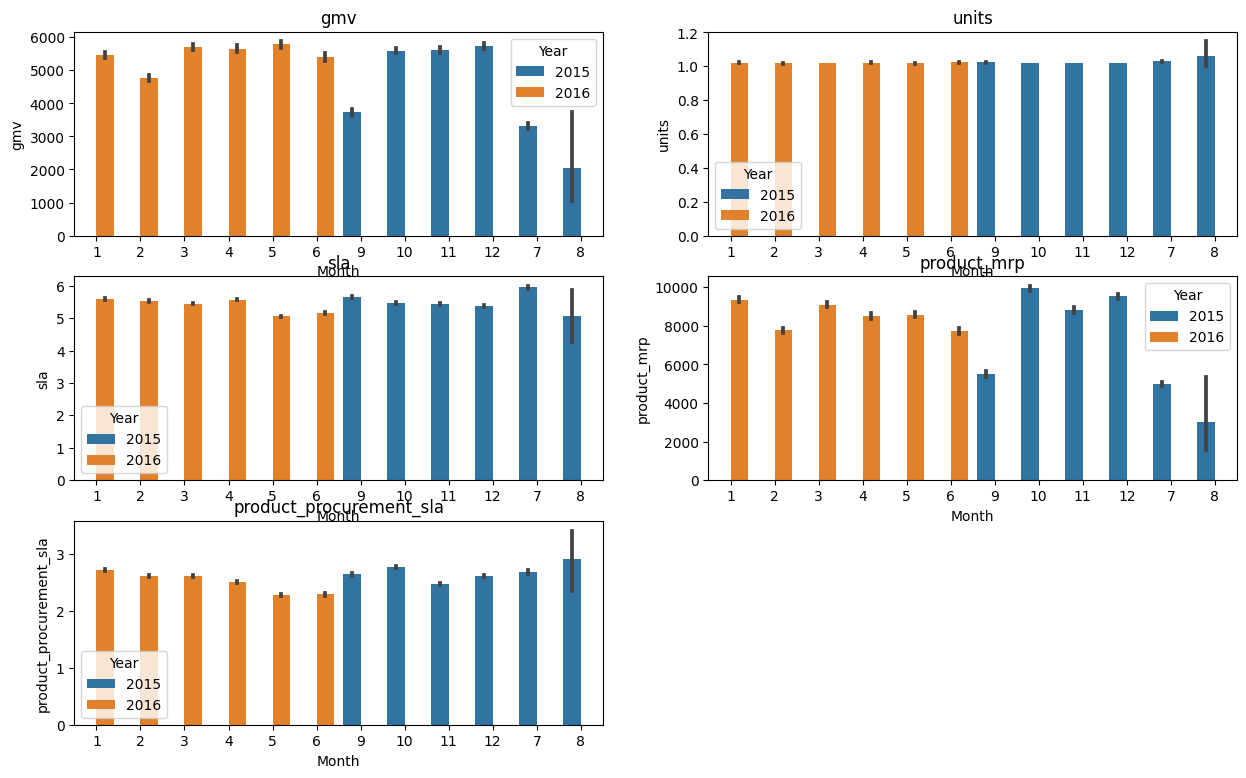

In [ ]:
plt.figure(figsize=(15, 9))
x=1
for i in num:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(x=EleData2['Month'],y=EleData2[i],hue=EleData2['Year'])
  x=x+1

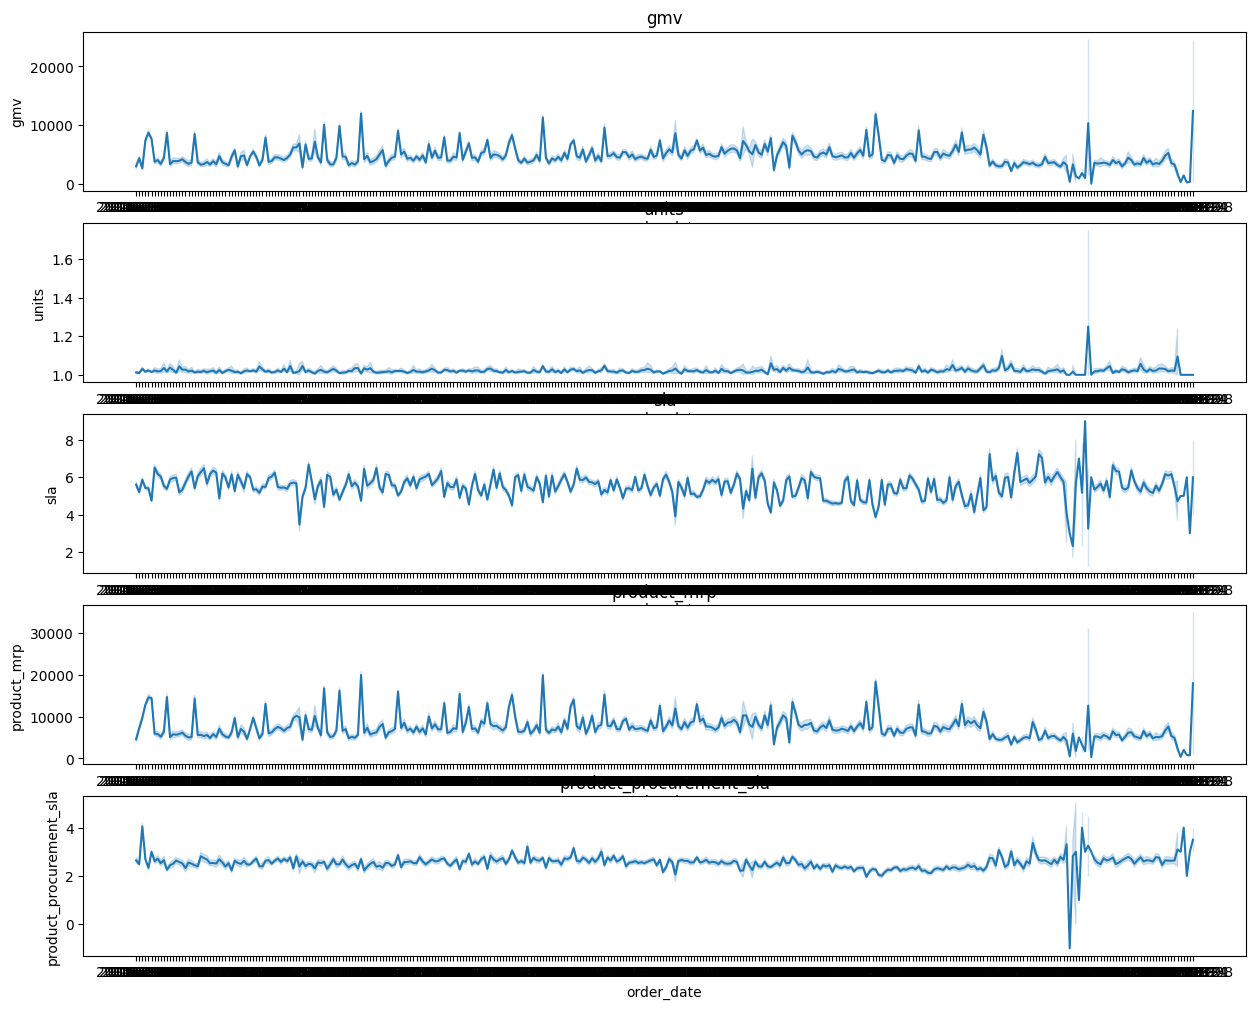

In [ ]:
plt.figure(figsize=(15, 12))
x=1
for i in num:
  plt.subplot(5,1,x)
  plt.title(i)
  sns.lineplot(x=EleData2['order_date'],y=EleData2[i])
  x=x+1

In [ ]:
for i in num:
  q1=EleData2[i].quantile(0.25)
  q3=EleData2[i].quantile(0.75)
  iqr=q3-q1
  lw=iqr-q1*1.5
  up=iqr+q3*1.5
  print(i,lw,up)
  EleData2.loc[EleData2[i]<lw,i]=lw
  EleData2.loc[EleData2[i]>up,i]=up

gmv 2876.5 9548.5
units -1.5 1.5
sla -3.0 13.5
product_mrp 4615.0 16525.0
product_procurement_sla 0.5 6.5


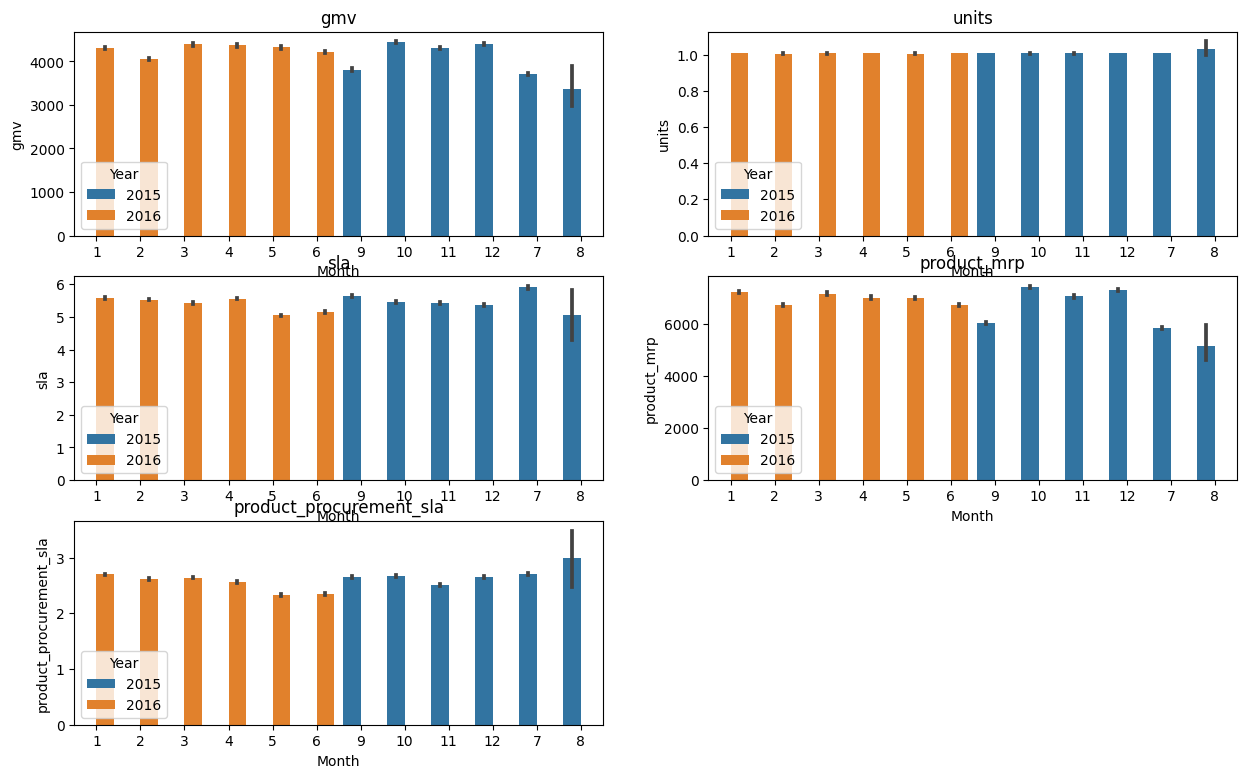

In [ ]:
plt.figure(figsize=(15, 9))
x=1
for i in num:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(x=EleData2['Month'],y=EleData2[i],hue=EleData2['Year'])
  x=x+1

## not changed overall pattern

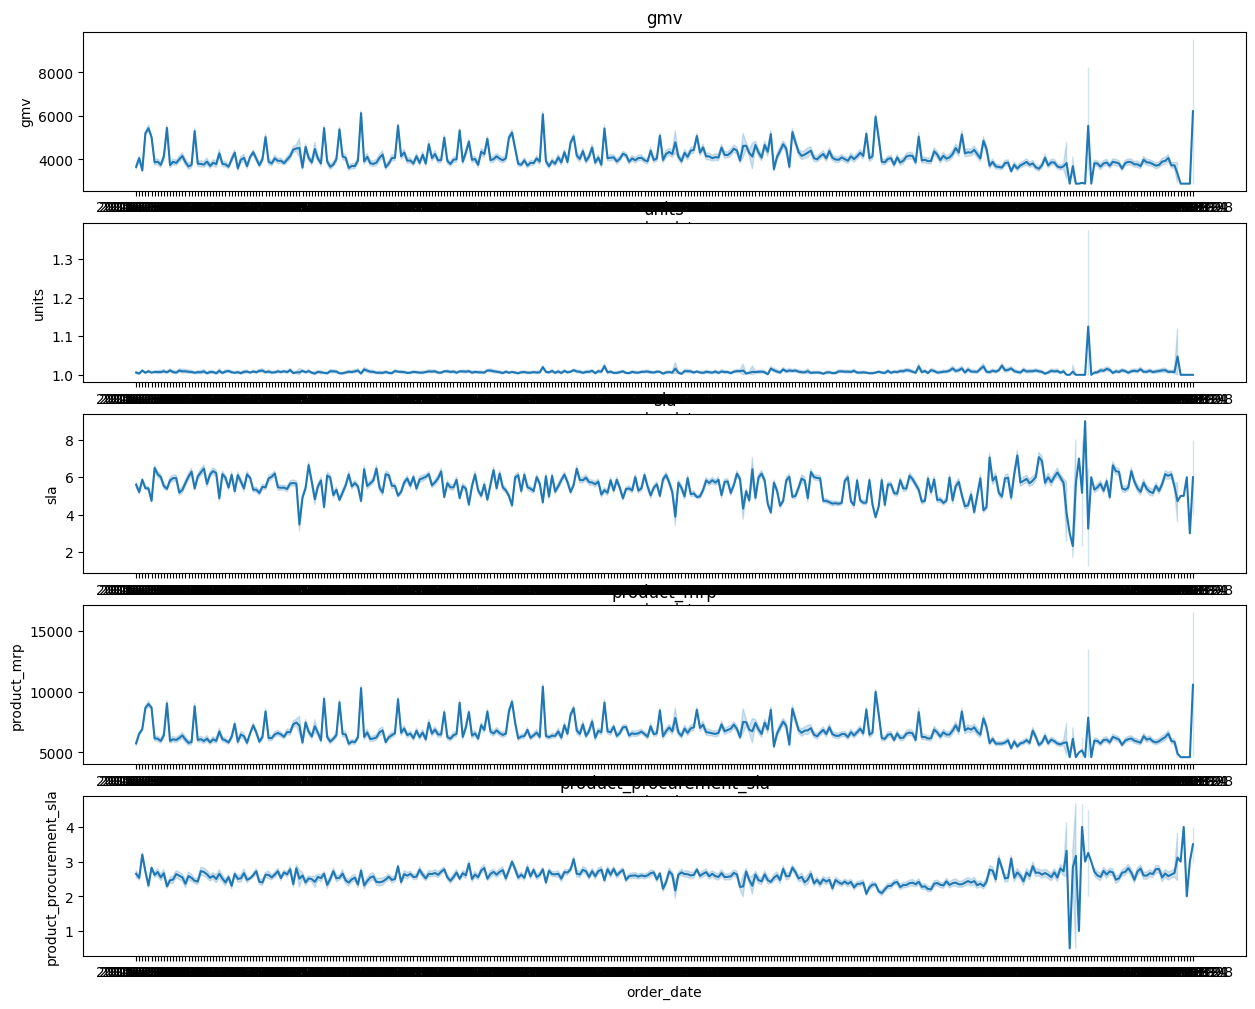

In [ ]:
plt.figure(figsize=(15, 12))
x=1
for i in num:
  plt.subplot(5,1,x)
  plt.title(i)
  sns.lineplot(x=EleData2['order_date'],y=EleData2[i])
  x=x+1

In [ ]:
obj.remove('order_date')
obj.remove('Year')
obj.remove('Month')

In [ ]:
obj

['order_payment_type',
 'product_analytic_category',
 'product_analytic_sub_category',
 'product_analytic_vertical_derived']

Data Analysis and feature extraction

In [ ]:
EleData2['order_date']=pd.to_datetime(EleData2['order_date']).dt.date

EleData2.head()


,order_date,Year,Month,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_mrp,product_procurement_sla,product_analytic_vertical_derived
1598,2015-10-04,2015,10,1.408217e+15,3075.0,1.0,cod,9.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad
1599,2015-10-14,2015,10,1.416985e+15,2876.5,1.0,cod,7.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad
1600,2015-10-15,2015,10,1.417669e+15,2899.0,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad
1601,2015-10-17,2015,10,1.419415e+15,2876.5,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad
1602,2015-10-26,2015,10,1.427168e+15,2876.5,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad


In [ ]:
## adding week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16.0    28486
44.0    13901
19.0    13257
30.0    12423
36.0    12171
25.0    12118
34.0    12032
48.0    10970
26.0     9725
32.0     9455
37.0     9402
23.0     9354
28.0     8977
35.0     8958
24.0     8529
27.0     8434
31.0     8218
33.0     8190
46.0     8126
17.0     8021
18.0     7975
47.0     7663
29.0     7549
22.0     7427
45.0     7383
49.0     7324
40.0     7124
41.0     7067
38.0     7067
50.0     6927
39.0     6772
20.0     6593
3.0      6495
51.0     6483
2.0      6262
15.0     6253
10.0     6214
52.0     6164
13.0     6148
21.0     5936
4.0      5754
12.0     5597
11.0     5585
14.0     5537
42.0     5254
5.0      2558
43.0     2512
53.0     1714
1.0      1600
9.0       921
6.0         4
8.0         2
7.0         1
Name: week, dtype: int64

In [ ]:
# 2. Discounts
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['gmv'])/EleData2['product_mrp'])*100).round(0)
EleData2.discount_per

1598       33.0
1599       38.0
1600       37.0
1601       38.0
1602       38.0
           ... 
1542374    50.0
1542375    50.0
1542376    59.0
1542377    56.0
1542378    49.0
Name: discount_per, Length: 394767, dtype: float64

In [ ]:
## joining rest of the data

# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [ ]:
## sales Calendar
SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'])

SalesCal1=SalesCal1[0].to_list()
EleData2['sale']=0
EleData2.loc[EleData.order_date.isin(SalesCal1),'sale']=1
EleData2.loc[EleData2.sale==1]


,order_date,Year,Month,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_mrp,product_procurement_sla,product_analytic_vertical_derived,week,discount_per,sale
1600,2015-10-15,2015,10,1.417669e+15,2899.0,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,37.0,1
1601,2015-10-17,2015,10,1.419415e+15,2876.5,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,38.0,1
1603,2015-10-16,2015,10,4.417730e+15,2876.5,1.0,prepaid,7.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,38.0,1
1608,2015-10-16,2015,10,3.418253e+15,2899.0,1.0,cod,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,37.0,1
1614,2015-10-15,2015,10,1.417435e+15,2899.0,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437932,2015-07-18,2015,7,2.188319e+08,9548.5,1.5,cod,10.0,entertainmentsmall,homeaudio,10500.0,5.0,Others,3.0,9.0,1
1446215,2015-08-29,2015,8,3.391016e+15,2876.5,1.0,cod,5.0,gaminghardware,gamingaccessory,4615.0,3.0,gamepad,9.0,38.0,1
1467403,2015-08-30,2015,8,3.000373e+17,2876.5,1.0,cod,5.0,gaminghardware,gamingaccessory,4615.0,4.0,gamepad,9.0,38.0,1
1499297,2015-08-28,2015,8,3.381470e+15,2876.5,1.0,cod,8.0,gaminghardware,gamingaccessory,4615.0,4.0,gamingheadset,9.0,38.0,1


In [ ]:
EleData2.info()
EleData2['week']=EleData2['week'].astype('object')
EleData2['order_date']=EleData.order_date.apply(lambda x : x.strip())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 1598 to 1542378
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_date                         394612 non-null  object 
 1   Year                               394612 non-null  object 
 2   Month                              394612 non-null  object 
 3   order_item_id                      394612 non-null  float64
 4   gmv                                394612 non-null  float64
 5   units                              394612 non-null  float64
 6   order_payment_type                 394612 non-null  object 
 7   sla                                394612 non-null  float64
 8   product_analytic_category          394612 non-null  object 
 9   product_analytic_sub_category      394612 non-null  object 
 10  product_mrp                        394612 non-null  float64
 11  product_procurement_sla            

In [224]:
### Weather
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont2015.isnull().sum()/Ont2015.shape[0]).reset_index()
req=todrop.loc[todrop[0]<0.40,:]['index'].to_list()
Ont2015_1=Ont2015[req]
Ont2016_1=Ont2016[req]
# EleData2.info()
Ont_Weather = pd.concat([Ont2015_1,Ont2016_1])
Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather.loc[:,['Date/Time','week']]
Ont_Weather.week.value_counts()

Ont_Weather.isnull().sum()/Ont_Weather.shape[0]

req.remove('Date/Time')
req.remove('Year')
req.remove('Month')
## weekly average imputed for nulls
Ont_Weather['Total Rain (mm)'].fillna(Ont_Weather.groupby('week')['Total Rain (mm)'].transform('mean'),inplace=True)
Ont_Weather['Total Snow (cm)'].fillna(Ont_Weather.groupby('week')['Total Snow (cm)'].transform('mean'),inplace=True)
Ont_Weather['Total Precip (mm)'].fillna(Ont_Weather.groupby('week')['Total Precip (mm)'].transform('mean'),inplace=True)
Ont_Weather['Snow on Grnd (cm)'].fillna(Ont_Weather.groupby('week')['Snow on Grnd (cm)'].transform('mean'),inplace=True)
## filling with weekly avg
Ont_Weather['Total Rain (mm)']=Ont_Weather.groupby('week')['Total Rain (mm)'].transform('mean')
Ont_Weather['Total Snow (cm)']=Ont_Weather.groupby('week')['Total Snow (cm)'].transform('mean')
Ont_Weather['Total Precip (mm)']=Ont_Weather.groupby('week')['Total Precip (mm)'].transform('mean')
Ont_Weather['Snow on Grnd (cm)']=Ont_Weather.groupby('week')['Snow on Grnd (cm)'].transform('mean')


# Ont_Weather.loc[(Ont_Weather.week >=1) & (Ont_Weather.week < 55)].isnull().sum()
# Ont_Weather[['week',"Rain_weekly_avg"]].value_counts().reset_index().sum().isnull()
Ont_Weather.isnull().sum()
Ont_Weather.loc[Ont_Weather["Total Rain (mm)"].isnull()]
Ont_Weather.loc[Ont_Weather["week"]==6]
Ont_Weather.loc[Ont_Weather["week"]==7]

## imputed as per previous and next week avg
Ont_Weather.loc[Ont_Weather["Total Rain (mm)"].isnull()]['Total Rain (mm)']=(2.6/2)
Ont_Weather.loc[Ont_Weather["Total Snow (cm)"].isnull()]['Total Snow (cm)']=0
Ont_Weather.loc[Ont_Weather["Total Precip (mm)"].isnull()]['Total Precip (mm)']=(2.6/2)
Ont_Weather.loc[Ont_Weather["Snow on Grnd (cm)"].isnull()]['Snow on Grnd (cm)']=0

Ont_Weather.loc[Ont_Weather["Total Rain (mm)"].isna()]
Ont_Weather.loc[Ont_Weather["week"]==26] # 7.2 , 0 , 7.2 , 0
# Ont_Weather.loc[Ont_Weather["week"]==28] #5.9 , 1.75	, 7.65	, 3.0
# Ont_Weather = Ont_Weather.groupby('week')[req].max().reset_index()

# Ont_Weather.loc[Ont_Weather["Total Rain (mm)"].isna()]['Total Rain (mm)'] =((7.2+5.9)/2)
Ont_Weather['Total Rain (mm)'].fillna(((7.2+5.9)/2),inplace=True)
Ont_Weather['Total Snow (cm)'].fillna(((1.75)/2),inplace=True)
Ont_Weather['Total Precip (mm)'].fillna(((7.2+7.65)/2),inplace=True)
Ont_Weather['Total Precip (mm)'].fillna((3/2),inplace=True)

<ipython-input-224-dccc41ed1f5b>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ont_Weather.loc[Ont_Weather["Total Rain (mm)"].isnull()]['Total Rain (mm)']=(2.6/2)
<ipython-input-224-dccc41ed1f5b>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ont_Weather.loc[Ont_Weather["Total Snow (cm)"].isnull()]['Total Snow (cm)']=0
<ipython-input-224-dccc41ed1f5b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [481]:
Ont_Weather.info()
ont_wk =Ont_Weather.groupby('week')['Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)'].max()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 365
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date/Time          731 non-null    datetime64[ns]
 1   Year               731 non-null    int64         
 2   Month              731 non-null    int64         
 3   Day                731 non-null    int64         
 4   Data Quality       456 non-null    object        
 5   Total Rain (mm)    731 non-null    float64       
 6   Total Snow (cm)    731 non-null    float64       
 7   Total Precip (mm)  731 non-null    float64       
 8   Snow on Grnd (cm)  724 non-null    float64       
 9   week               731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 62.8+ KB


<ipython-input-481-b0ac31e63ca0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ont_wk =Ont_Weather.groupby('week')['Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)'].max()


In [ ]:
# MonthlyNPS

# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars=['Header'],value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"]).reset_index()
NPS.rename(columns={"variable":"Month1","value":"Stock_Index"},inplace=True)
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6

NPS.loc[NPS['Header']=='Stock Index',['Header',"Month","Stock_Index"]]
NPS






,index,Header,Month1,Stock_Index,Month
0,0,NPS,July'15,54.599588,7
1,1,Stock Index,July'15,1177.000000,7
2,2,NPS,Aug'15,59.987101,8
3,3,Stock Index,Aug'15,1206.000000,8
4,4,NPS,Sept'15,46.925419,9
5,5,Stock Index,Sept'15,1101.000000,9
6,6,NPS,Oct'15,44.398389,10
7,7,Stock Index,Oct'15,1210.000000,10
8,8,NPS,Nov'15,47.000000,11
9,9,Stock Index,Nov'15,1233.000000,11


In [ ]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData4=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index',['Header',"Month","Stock_Index"]],how='left',left_on='Month',right_on='Month')
EleData4=pd.merge(EleData4,NPS.loc[NPS['Header']=='NPS',['Header',"Month","Stock_Index"]],how='left',left_on='Month',right_on='Month')
EleData4.drop(['Header_x','Header_y'],1,inplace=True)
EleData4.rename(columns={"Stock_Index_x":"Stock_Index","Stock_Index_y":"NPS"},inplace=True)
EleData4.head()

<ipython-input-49-fb53b3f7d508>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  EleData4.drop(['Header_x','Header_y'],1,inplace=True)


,order_date,Year,Month,order_item_id,gmv,units,order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_mrp,product_procurement_sla,product_analytic_vertical_derived,week,discount_per,sale,Stock_Index,NPS
0,2015-10-04,2015,10,1.408217e+15,3075.0,1.0,cod,9.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,14.0,33.0,0,1210.0,44.398389
1,2015-10-14,2015,10,1.416985e+15,2876.5,1.0,cod,7.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,38.0,0,1210.0,44.398389
2,2015-10-15,2015,10,1.417669e+15,2899.0,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,37.0,1,1210.0,44.398389
3,2015-10-17,2015,10,1.419415e+15,2876.5,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,16.0,38.0,1,1210.0,44.398389
4,2015-10-26,2015,10,1.427168e+15,2876.5,1.0,prepaid,5.0,gaminghardware,gamingaccessory,4615.0,5.0,gamepad,17.0,38.0,0,1210.0,44.398389


In [ ]:
# EleData4.info()
EleData4.rename(columns={"sale":"sale_day_flag"},inplace=True)

In [ ]:

obj=[]
for i in EleData4.columns:
  if EleData4[i].dtype=='object':
    obj.append(i)
obj
obj.remove('order_date')
obj.remove('Year')
obj.remove('Month')
obj.remove('week')

In [ ]:
# # EleData3.info()
# EleData5=pd.merge(EleData4,pd.get_dummies(EleData4[obj],dtype='int'),left_index=True,right_index=True)
# EleData5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394767 entries, 0 to 394766
Data columns (total 34 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   order_date                                          394767 non-null  object 
 1   Year                                                394612 non-null  object 
 2   Month                                               394612 non-null  object 
 3   order_item_id                                       394612 non-null  float64
 4   gmv                                                 394612 non-null  float64
 5   units                                               394612 non-null  float64
 6   order_payment_type                                  394612 non-null  object 
 7   sla                                                 394612 non-null  float64
 8   product_analytic_category                           394612 non-n

In [356]:
Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)

In [357]:

Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()

<ipython-input-357-933eea4f9206>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Investment.drop(["Unnamed: 0"],1,inplace=True)


,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0
2,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0
3,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0
4,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0


In [ ]:
Investment.head()

,Unnamed: 0,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,0.0,2015.0,7.0,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,0.0,0.0
1,0.0,2015.0,8.0,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,0.0,0.0
2,0.0,2015.0,9.0,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,0.0,0.0
3,0.0,2015.0,10.0,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,0.0,0.0
4,0.0,2015.0,11.0,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,0.0,0.0


In [358]:
EleData5=pd.merge(EleData4,Investment,on=['Month','Year'])

In [389]:
# EleData5.drop(['number_of_days','month_start'],1,inplace=True)
EleData5.rename(columns={' Affiliates':'Affiliates'},inplace=True)
EleData5.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394612 entries, 0 to 394611
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_date                         394612 non-null  object 
 1   Year                               394612 non-null  object 
 2   Month                              394612 non-null  object 
 3   order_item_id                      394612 non-null  float64
 4   gmv                                394612 non-null  float64
 5   units                              394612 non-null  float64
 6   order_payment_type                 394612 non-null  object 
 7   sla                                394612 non-null  float64
 8   product_analytic_category          394612 non-null  object 
 9   product_analytic_sub_category      394612 non-null  object 
 10  product_mrp                        394612 non-null  float64
 11  product_procurement_sla            3946

,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
week,,,,
-25,4.800000,0.800000,5.60,0.200000
-24,0.000000,0.000000,0.00,4.000000
-23,0.400000,0.000000,0.40,0.666667
-22,0.000000,0.000000,0.00,1.333333
-21,0.000000,5.000000,5.00,10.250000
...,...,...,...,...
75,2.050000,0.000000,2.05,0.000000
76,0.000000,4.200000,4.20,8.400000
77,0.333333,1.666667,2.00,17.333333


In [391]:
## aggregating everything at week level


sales_dist = EleData5[['sale_day_flag','order_date','week']].drop_duplicates()

weekly_sales_day =sales_dist.loc[sales_dist['sale_day_flag']==1].groupby('week')['sale_day_flag'].sum().reset_index()


## order item count for each week and product sub cat
oc =EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['order_item_id'].count()


## sum of units, payment types and type of product verticals  at week and product category level
g1=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['gmv','units'].sum().reset_index()

# product mrp , product sla , discount avg is considered
prd_week_level=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['sla','product_mrp','product_procurement_sla','discount_per'].agg(['mean']).reset_index()

# Weather and investments , max is considered as the data is at month level
week_level=EleData5.groupby(['week'])['Stock_Index','NPS',
                                      'Total Investment','TV','Digital','Sponsorship',
                                      'Content Marketing','Online marketing','Affiliates','SEM','Radio','Other'].agg(['max']).reset_index()


<ipython-input-391-5c69c91cd70b>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g1=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['gmv','units'].sum().reset_index()
<ipython-input-391-5c69c91cd70b>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prd_week_level=EleData5.groupby(['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'])['sla','product_mrp','product_procurement_sla','discount_per'].agg(['mean']).reset_index()
<ipython-input-391-5c69c91cd70b>:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  week_level=EleData5.groupby(['week'])['Stock_Index','NPS',


In [ ]:
Investment.head()
week_level.head()#0.177062

,week,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Stock_Index,NPS,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1.0,8.158145,0.0,8.158145,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
1,2.0,3.989980,0.0,3.989980,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
2,3.0,0.992013,0.0,0.992013,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
3,4.0,0.729197,0.0,0.729197,0.0,1177.000000,54.599588,0.017754,0.000224,0.002636,0.007715,9.707571e-07,0.001381,0.000569,0.005228,0.0,0.0
4,5.0,0.000000,0.0,0.000000,0.0,1177.022674,54.603800,0.017744,0.000224,0.002635,0.007710,9.700032e-07,0.001380,0.000569,0.005226,0.0,0.0


In [504]:
weekly=pd.merge(pd.DataFrame(week_level),pd.merge(pd.DataFrame(prd_week_level),pd.DataFrame(g1),on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='outer'),on=['week'],how='outer')
weekly=pd.merge(weekly,weekly_sales_day, on ='week',how='left')
weekly = pd.merge(weekly,ont_wk,on='week',how='left')
weekly = pd.merge(weekly,oc,on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='left')
# weekly[['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type']].value_counts()


<ipython-input-504-902d4a0c508b>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  weekly=pd.merge(pd.DataFrame(week_level),pd.merge(pd.DataFrame(prd_week_level),pd.DataFrame(g1),on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='outer'),on=['week'],how='outer')
<ipython-input-504-902d4a0c508b>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  weekly=pd.merge(pd.DataFrame(week_level),pd.merge(pd.DataFrame(prd_week_level),pd.DataFrame(g1),on=['week','product_analytic_sub_category','product_analytic_vertical_derived','order_payment_type'],how='outer'),on=['week'],how='outer')


In [505]:
# weekly.info()
weekly.rename(columns={'sale_day_flag_y':'number_of_sales_in_wk','order_item_id':'order_count'},inplace=True)

for i in weekly.filter(regex='mean').columns:
  m=str(i).replace("', 'mean')",'').replace("('",'').replace("', 'max')",'')
  print(i)
  weekly[m]=weekly[i]
  weekly.drop([i],1,inplace=True)

for i in weekly.filter(regex='max').columns:
  m=str(i).replace("', 'mean')",'').replace("('",'').replace("', 'max')",'')
  print(i)
  weekly[m]=weekly[i]
  weekly.drop([i],1,inplace=True)
# weekly.info() #38


('sla', 'mean')
('product_mrp', 'mean')
('product_procurement_sla', 'mean')
('discount_per', 'mean')
('Stock_Index', 'max')
('NPS', 'max')
('Total Investment', 'max')
('TV', 'max')
('Digital', 'max')
('Sponsorship', 'max')
('Content Marketing', 'max')
('Online marketing', 'max')
('Affiliates', 'max')
('SEM', 'max')
('Radio', 'max')
('Other', 'max')


<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inplace=True)
<ipython-input-505-0b48551b2537>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop([i],1,inp

In [506]:

# print(weekly.columns)
# weekly.info()
# weekly1.iloc[:,4:8].columns
weekly.drop(weekly.iloc[:,1:2].columns,1,inplace=True)
weekly.drop(weekly.iloc[:,4:8].columns,1,inplace=True)
# weekly.drop(["Year","Month","Day","Data Quality"],1,inplace=True)


<ipython-input-506-2a3f56c547d5>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop(weekly.iloc[:,1:2].columns,1,inplace=True)
<ipython-input-506-2a3f56c547d5>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  weekly.drop(weekly.iloc[:,4:8].columns,1,inplace=True)


In [507]:
weekly['sale_day_flag'].fillna(0,inplace=True)


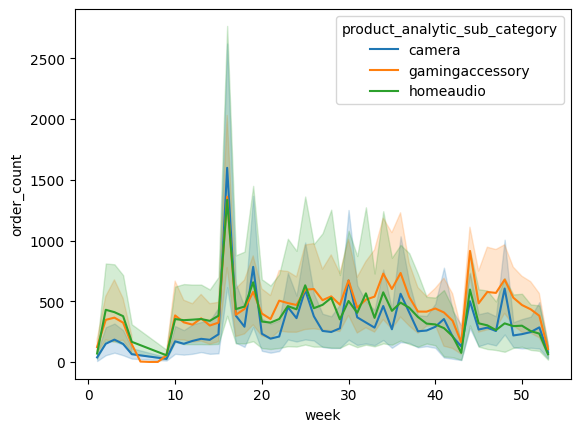

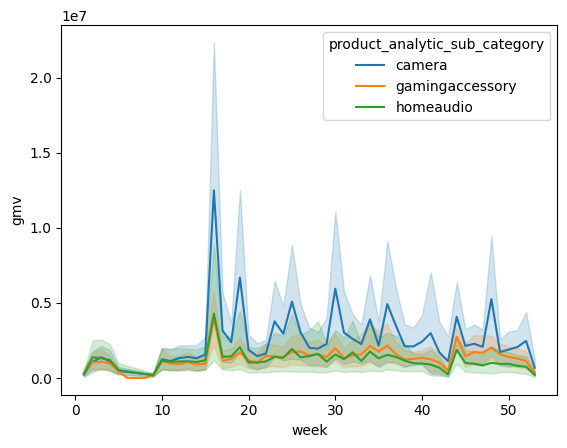

In [508]:
sns.lineplot(x=weekly['week'],y=weekly['order_count'],hue=weekly['product_analytic_sub_category'])
plt.show()
sns.lineplot(x=weekly['week'],y=weekly['gmv'],hue=weekly['product_analytic_sub_category'])
plt.show()

In [343]:
weekly1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 1064
Data columns (total 36 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   week                                                153 non-null    float64
 1   product_analytic_sub_category                       153 non-null    object 
 2   gmv                                                 153 non-null    float64
 3   units                                               153 non-null    float64
 4   order_payment_type_cod                              153 non-null    int64  
 5   order_payment_type_prepaid                          153 non-null    int64  
 6   product_analytic_vertical_derived_Others            153 non-null    int64  
 7   product_analytic_vertical_derived_dslr              153 non-null    int64  
 8   product_analytic_vertical_derived_fmradio           153 non-null    int64  
 9 

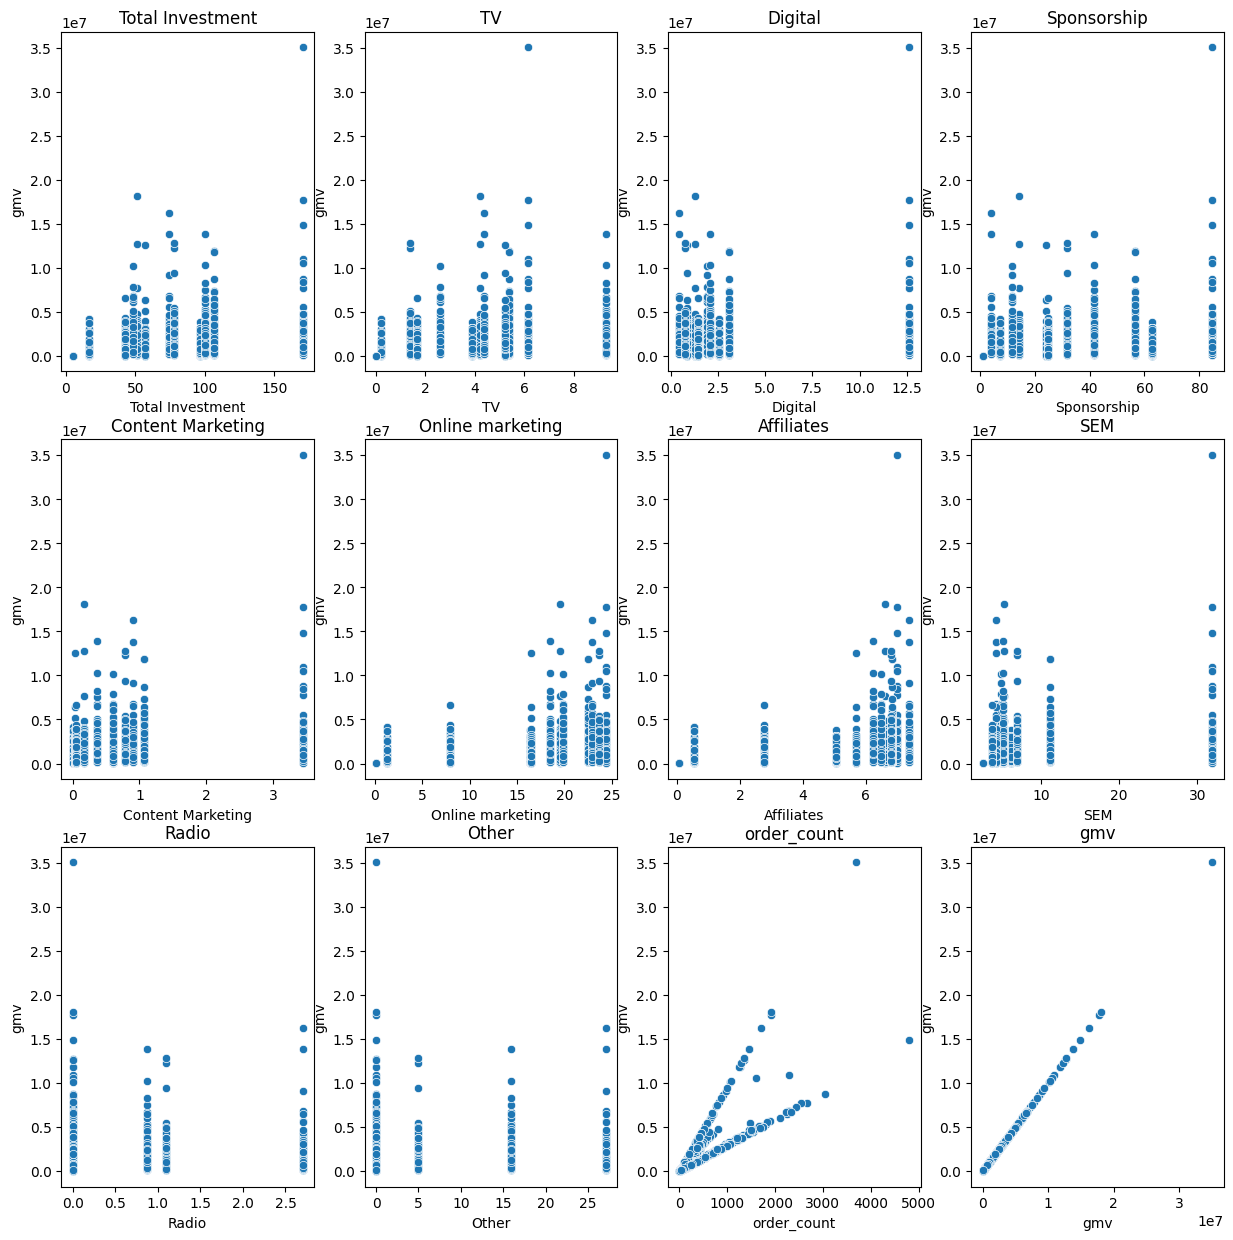

In [510]:
markinv = ['Total Investment','TV','Digital','Sponsorship','Content Marketing','Online marketing','Affiliates','SEM','Radio','Other','order_count','gmv']

plt.figure(figsize=(15, 15))
x=1
for i in markinv:
  plt.subplot(3,4,x)
  plt.title(i)
  sns.scatterplot(y=weekly['gmv'],x=weekly[i])
  x=x+1

## TV : TV investment till 6 is fine , after that not much gmv increase
## Digitial : 3
# Sponsorship : 60
# content : 1
# Ol higher > 15


In [511]:
weekly[['Total Rain (mm)','Total Snow (cm)','Total Precip (mm)','Snow on Grnd (cm)']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   week                               1003 non-null   float64
 1   product_analytic_sub_category      1003 non-null   object 
 2   product_analytic_vertical_derived  1003 non-null   object 
 3   order_payment_type                 1003 non-null   object 
 4   gmv                                1003 non-null   float64
 5   units                              1003 non-null   float64
 6   sale_day_flag                      1003 non-null   float64
 7   Total Rain (mm)                    1003 non-null   float64
 8   Total Snow (cm)                    1003 non-null   float64
 9   Total Precip (mm)                  1003 non-null   float64
 10  Snow on Grnd (cm)                  983 non-null    float64
 11  order_count                        1003 non-null   int64